# Training Models - Ch4
We'll do more than just treat models as black boxes in this chapter.



In [14]:
#Linear Algebra micro review
import pandas as pd

#Dot Product of vector
vec = pd.DataFrame([1,3,-5])
vec

,0
0,1
1,3
2,-5


In [15]:
vec.T

,0,1,2
0,1,3,-5


In [16]:
vec.T.dot(pd.DataFrame([4,-2,-1]))

,0
0,3


## Linear Regression
Generalized, it is an equation for a line where the "mx" part (of y = mx + b) is a weighted sum of input features.

To train a linear model, you find values of theta that minimize error metric. Most commonly for linear that is RMSE (root mean square error). Or use MSE, since it is easier.

The **Normal Equation** is solved for theta^ directly, and is written in terms of X and y. It is "closed-form".

In [22]:
# We'll generate data to play with this idea.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
# our random generated linear dataset.

In [39]:
X, y

(array([[1.56015766],
        [0.00825418],
        [1.79513956],
        [0.45158773],
        [1.54348488],
        [1.29185483],
        [1.26197073],
        [1.51636216],
        [1.68668401],
        [0.14182611],
        [1.22599744],
        [0.64136052],
        [1.04460438],
        [0.60475216],
        [0.30620747],
        [1.55474975],
        [0.71017747],
        [0.07195875],
        [0.08500955],
        [0.69513567],
        [1.17635102],
        [1.11564096],
        [1.48726188],
        [1.03511265],
        [0.94807118],
        [1.00017036],
        [1.78000004],
        [0.82750811],
        [1.40636945],
        [0.6794036 ],
        [0.96599975],
        [0.85685211],
        [0.70888888],
        [1.20777568],
        [0.31073021],
        [1.97847359],
        [0.42101168],
        [0.06428027],
        [0.35234656],
        [1.51879509],
        [0.76987411],
        [1.32230985],
        [0.82492445],
        [1.74914647],
        [0.59930956],
        [1

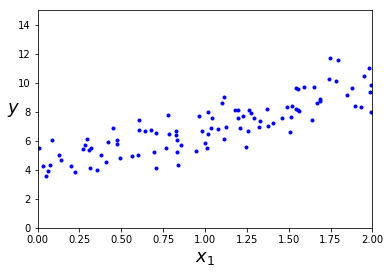

In [24]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [26]:
X_b = np.c_[np.ones((100,1)), X] #adds x0 = 1 to each instance, for dot product and matrix sizing i presume.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.14311814],
       [2.77930597]])

In [34]:
np.linalg.inv(X_b.T.dot(X_b))

array([[ 0.0430215 , -0.03212514],
       [-0.03212514,  0.03125311]])

In [35]:
X_b.T.dot(X_b)

array([[100.        , 102.79021769],
       [102.79021769, 137.65510727]])

Here we used the normal equation to solve for theta. Ideally theta would be 4 and 3, since that is what we used to generate the noise.

In [27]:
#Make predictions against our model and plot.
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.14311814],
       [9.70173007]])

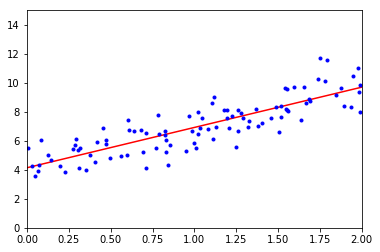

In [28]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [37]:
#Same regression with Sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.14311814]), array([[2.77930597]]))

In [38]:
lin_reg.predict(X_new)

array([[4.14311814],
       [9.70173007]])

## Gradient Descent
Tweak parameters iteratively in order to minimize a cost function. (finds local/global mins)

Practically speaking, you can fill theta (your model parameters) with random numbers and start changing them gradually to minimize the MSE. The number of steps you take is the learning rate hyperparam. learning rate too low and it takes too long, too high and you might jump across a valley and miss the minimum.

### Tip
For gradient descent, ensure you've used something like `sklearn StandardScaler` to ensure features are similar scale. This helps speed up convergence.

### Batch Gradient Descent
We are essentially computing partial derivatives with respect to each model parameter (thetas). AKA how much will the cost function change, if I change this input param just a little bit.

It is called "Batch" because the entire training set is used in the computation for each gradient step. (to compute all the partial derivatives)

The gradients point "up hill" which is why we subtract.

In [46]:
#Example gradient Descent.
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) #random initialization.

In [47]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [48]:
theta # It worked!

array([[4.14311814],
       [2.77930597]])

### Stocahstic Gradient Descent
Much faster than batch since it doesn't use the entire traning set at each step. Once the algorithm stops, the parameter values it found are simply "good", but not guaranteed to be optimal. The randomness also helps it find the global minimum, if the cost function is not convex.

This is also called "simulated annealing".

The "learning schedule" determines what the learning rate will be at each iteration.

In [53]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparams.

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) #random init

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [54]:
theta

array([[4.08712386],
       [2.76558834]])

Similar good results to batch but we only had to iterate 50 times (50 "epochs").

In [56]:
# Stochastic Gradient Descent using sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

/home/clh/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [57]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.20067249]), array([2.86236233]))

### Mini Batch
sort of a combo of Batch and Stochastic. compute gradient at each step by randomly selecting small subset of instances from training set.

## Polynomial Regression

In [58]:
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

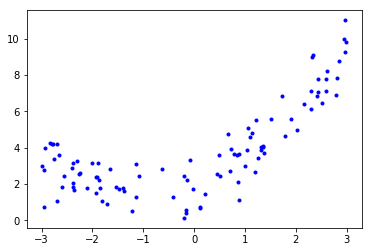

In [60]:
plt.plot(X,y, "b.")
plt.show()

In [62]:
# A simple straight line won't fit this, so lets use PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.91116883])

In [64]:
X_poly[0] #added the square of X to the dataset.

array([-1.91116883,  3.65256628])

In [66]:
#Now we can fit a standard linear regression onto this polynomial data.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([2.03644556]), array([[0.98820479, 0.49802663]]))

Not too bad, since the original function was `y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)`

### Learning Curves

How do you determine what type of curve to fit your data? (aka which degree polynomial).